<a href="https://colab.research.google.com/github/DengChiung/kmuh20231206/blob/main/test_association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
store_data = pd.read_csv('opopcode_list_dell.csv',encoding = 'big5-hkscs', dtype = str)
store_data['opdept']=store_data['opdept'].str.zfill(4)
#store_data = pd.read_excel('opopcode_list_dell.xls',dtype={'opdept':str})
store_data=store_data[store_data['opdept']=='0270']#
store_data=store_data[['bopcode1','aopcode1','aopcode2','aopcode3','aopcode4']]
store_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bopcode1,aopcode1,aopcode2,aopcode3,aopcode4
65,62015B,62054B,NaN,NaN,NaN
78,62002C,62002C,NaN,NaN,NaN
79,48006C,65058B,64099B,64112B,NaN
80,62012C,62012C,64275C,NaN,NaN
81,64025C,64003C,NaN,NaN,NaN


In [133]:
unique_li = [store_data[col].unique().tolist() for col in store_data.columns]
items = set([item for item_li in unique_li for item in item_li if item is not np.NaN ])
#items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
#OneHotEncoding item_rows
encoded_vals = []

for index, row in store_data.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc_item in uncommons:
        labels[uc_item] = 0
    for com_item in commons:
        labels[com_item] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
display(ohe_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,83028C,751430,64274C,48005C,48006C,327001,62027B,48002C,54020C,64031C,...,62010C,62022C,64229B,60504211,56018B,60505213,62060B,83048C,62054B,62015B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [140]:
#Apriori - Reduce the data
freq_items = apriori(ohe_df, min_support=0.02, use_colnames=True, verbose=1)
display(freq_items.head(7))
display(freq_items.tail(3))

Processing 51 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.041667,(64274C)
1,0.125000,(48005C)
2,0.296296,(48006C)
3,0.032407,(62011C)
4,0.064815,(64112B)
5,0.032407,(62032B)
6,0.064815,(60506113)


,support,itemsets
29,0.027778,"(62054B, 48006C)"
30,0.023148,"(64099B, 64112B)"
31,0.027778,"(64112B, 733537)"


In [141]:
#Max, Min values of Support
display(freq_items.sort_values(by = 'support', ascending=False).head(3))
display(freq_items.sort_values(by = 'support', ascending=False).tail(3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.296296,(48006C)
19,0.212963,(64197C)
1,0.125000,(48005C)


,support,itemsets
12,0.023148,(62002C)
30,0.023148,"(64099B, 64112B)"
8,0.023148,(65058B)


In [142]:
#Association Rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5).sort_values(by = ['lift', 'confidence', 'support'], ascending =False)
print('rules.shape :', rules.shape)
display(rules.head(10))
display(rules.tail(10))

rules.shape : (2, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(733537),(64112B),0.027778,0.064815,0.027778,1.000000,15.428571,0.025977,inf,0.961905
0,(64099B),(64112B),0.027778,0.064815,0.023148,0.833333,12.857143,0.021348,5.611111,0.948571


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(733537),(64112B),0.027778,0.064815,0.027778,1.000000,15.428571,0.025977,inf,0.961905
0,(64099B),(64112B),0.027778,0.064815,0.023148,0.833333,12.857143,0.021348,5.611111,0.948571


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


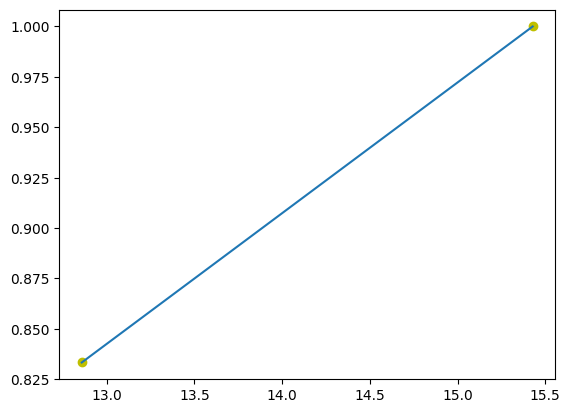

In [143]:

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))